In [199]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib
import os 
import joblib

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (1 , 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
os.listdir('./weather-dataset-rattle-package')
train_csv = './weather-dataset-rattle-package' + '/weatherAUS.csv'

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [4]:
raw_df = pd.read_csv(train_csv)

In [5]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [6]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

In [7]:
inputs_cols = list(train_df.columns[1:-1])
target_col = train_df.columns[-1]

train_inputs = train_df[inputs_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[inputs_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[inputs_cols].copy()
test_targets = test_df[target_col].copy()

In [8]:
numeric_cols = train_inputs.select_dtypes(include= np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [9]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [10]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [11]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/tmp/ipykernel_7994/1233257710.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_7994/1233257710.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_7994/1233257710.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

In [12]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [13]:
model = DecisionTreeClassifier(random_state=42)

In [14]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [15]:
train_preds = model.predict(X_train)
pd.Series(train_preds).value_counts()

No     76192
Yes    21796
Name: count, dtype: int64

In [16]:
accuracy_score(train_preds, train_targets)

0.9999795893374699

In [17]:
train_prods = model.predict_proba(X_train)

In [18]:
model.score(X_val, val_targets)

0.7936684416876353

In [19]:
val_targets.value_counts()/len(val_targets)

RainTomorrow
No     0.790626
Yes    0.209374
Name: count, dtype: float64

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

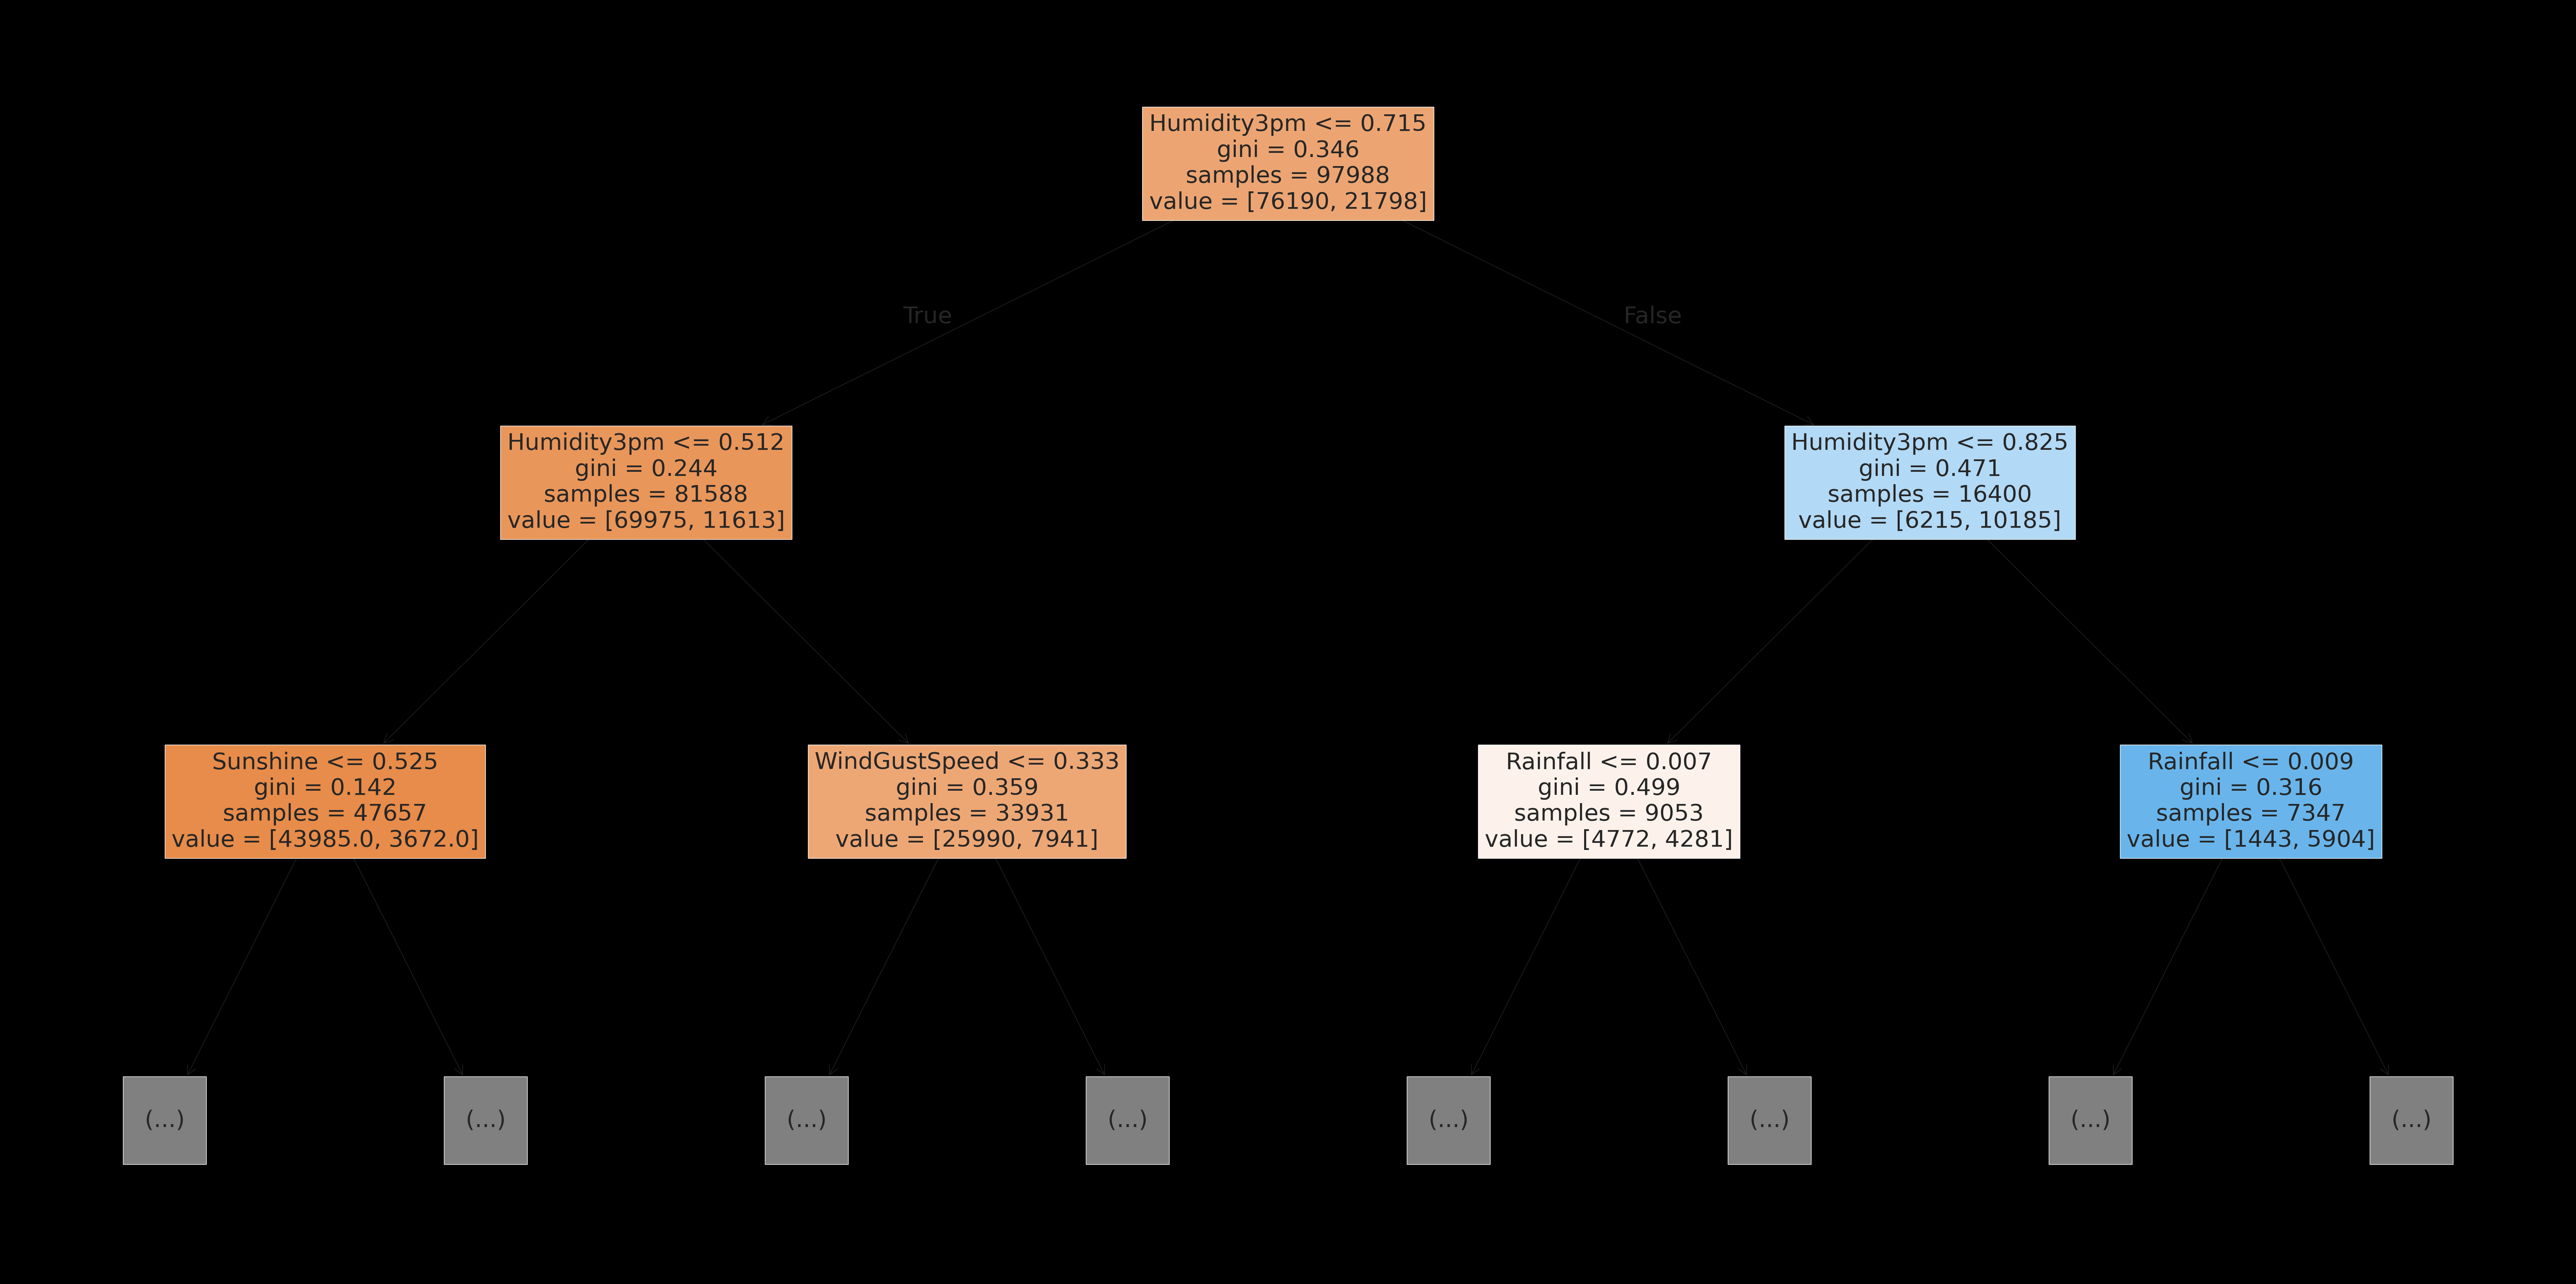

In [20]:
plt.figure(figsize=(80, 40))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

In [21]:
model.tree_.max_depth

49

In [22]:
tree_text = export_text(model, feature_names=list(X_train.columns), max_depth=10)

In [23]:
model.feature_importances_

array([3.72348864e-02, 3.02750170e-02, 4.46807871e-02, 2.31016443e-02,
       4.74029876e-02, 6.02158346e-02, 2.59596261e-02, 2.87123098e-02,
       3.72718924e-02, 2.78696714e-01, 3.74751640e-02, 6.22463592e-02,
       1.50293521e-02, 1.72695492e-02, 3.51997396e-02, 3.28171151e-02,
       2.07437921e-03, 1.64079963e-03, 1.01783054e-03, 6.88212657e-04,
       1.48034667e-03, 1.10335980e-03, 1.19280342e-03, 1.77001797e-03,
       8.18956871e-04, 1.30986391e-03, 8.00314193e-04, 2.03677225e-03,
       1.38645663e-03, 4.84888047e-04, 6.08349928e-04, 1.26483304e-03,
       1.45258514e-04, 1.50514431e-03, 1.07182434e-03, 1.44829853e-03,
       9.12938347e-04, 8.15936194e-04, 1.26468932e-03, 1.49092396e-03,
       6.60526489e-04, 7.09652768e-04, 1.02344514e-03, 1.54844869e-03,
       1.31824900e-03, 6.07286685e-04, 5.04774518e-04, 1.50976724e-03,
       1.36782184e-03, 2.12844007e-03, 1.24769141e-03, 1.92047622e-03,
       1.46145581e-03, 2.12670031e-03, 1.36401119e-03, 4.10431985e-04,
      

In [24]:
importance_df = pd.DataFrame({
    'features' : X_train.columns,
    'importance' :model.feature_importances_
}).sort_values('importance', ascending=False)

In [25]:
importance_df.head(10)

,features,importance
9,Humidity3pm,0.278697
11,Pressure3pm,0.062246
5,WindGustSpeed,0.060216
4,Sunshine,0.047403
2,Rainfall,0.044681
10,Pressure9am,0.037475
8,Humidity9am,0.037272
0,MinTemp,0.037235
14,Temp9am,0.035200
15,Temp3pm,0.032817


In [26]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [27]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [28]:
model.score(X_train, train_targets)

0.8551863493488998

In [29]:
model.score(X_val, val_targets)

0.8461583474749839

In [30]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.7, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.58\ngini = 0.335\nsamples = 6010\nvalue = [4731, 1279]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'WindGustSpeed <= 0.391\ngini = 0.108\nsamples = 41647\nvalue = [39254, 2393]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.3, 'Rainfall <= 0.008\ngini = 0.304\nsamples = 27841\nvalue = [22637, 5204]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Pressure3pm <= 0.546\ngini = 0.495\nsamples

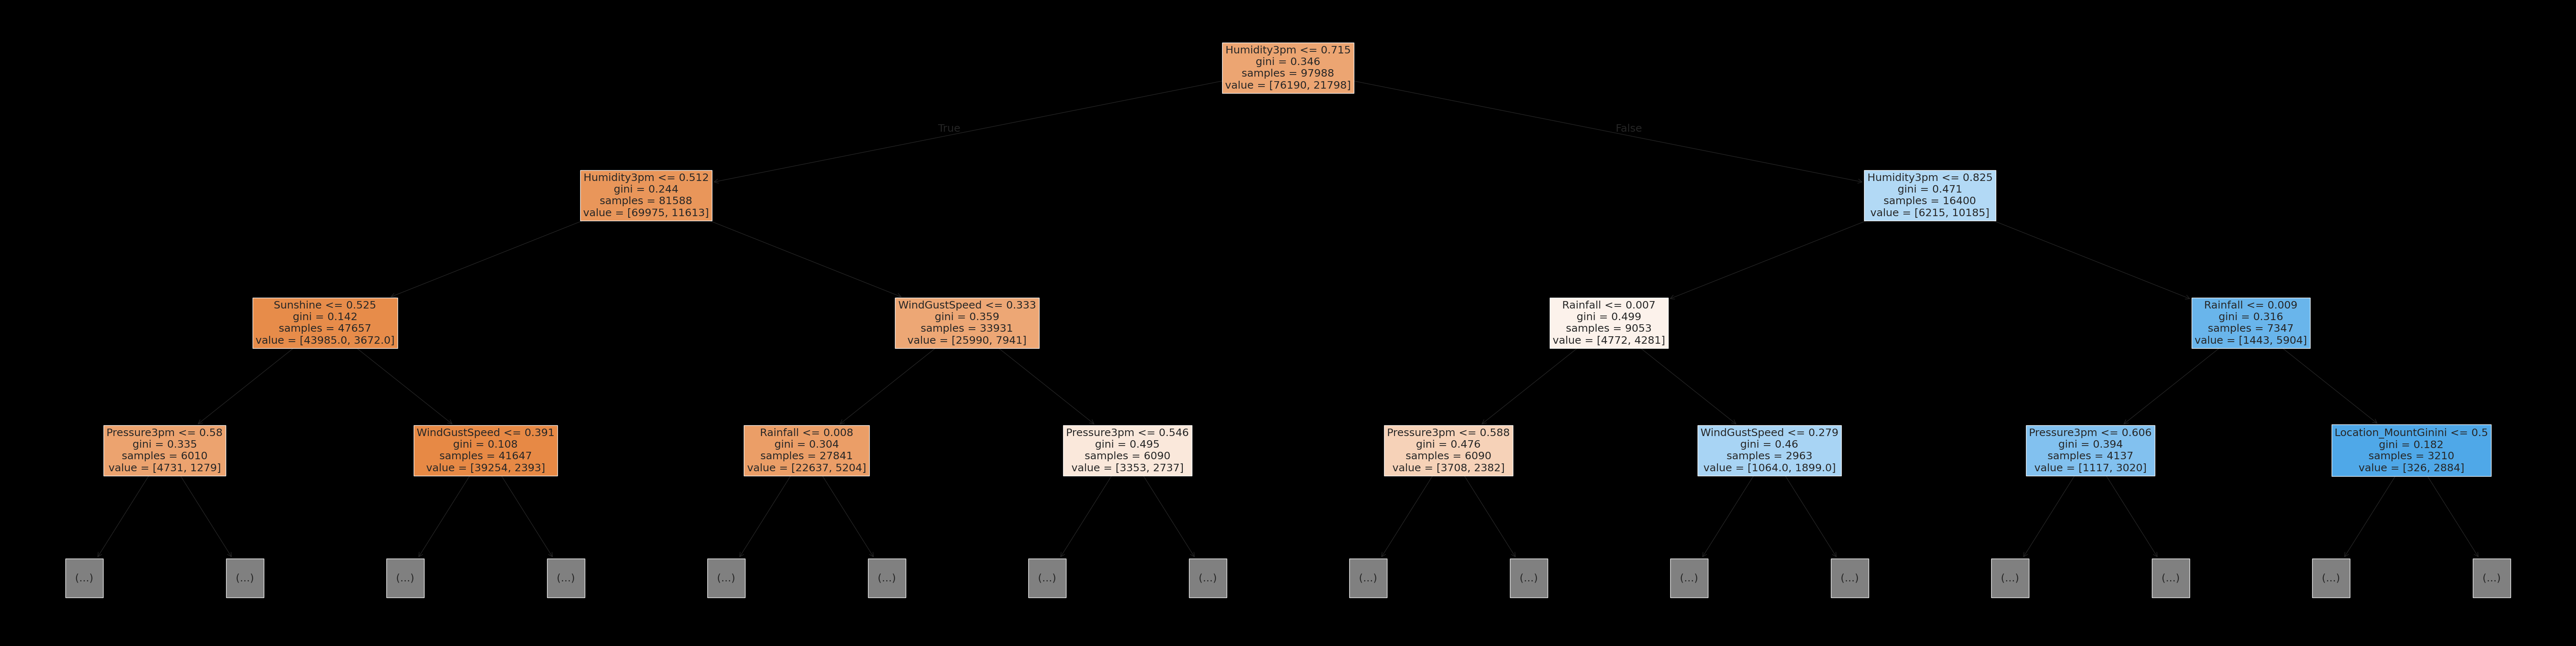

In [31]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

In [32]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- WindGustDir_N >  0.50
|   |   |   |   |   |   |   |--- Sunshine <= 0.40
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Sunshine >  0.40
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- Humidity9am <= 0.80
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Humidity9am >  0.80
|   |   |   |   |   |   |   |   |--- class: Yes


In [33]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error' : val_error}

In [34]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range (1,21)])

In [35]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


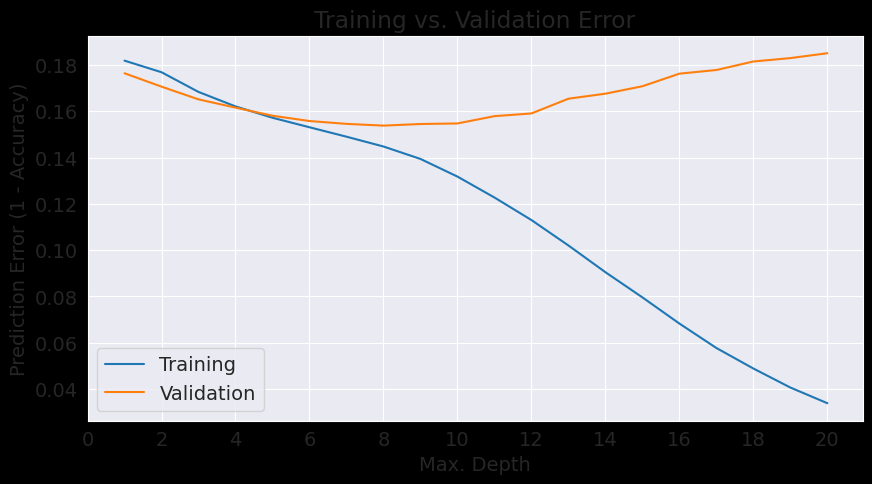

In [36]:
plt.figure(figsize=(10,5))
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [37]:
model =  DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.852696248520227

In [38]:
model.score(X_val, val_targets)

0.8471531394464276

In [39]:
model.tree_.max_depth

11

In [40]:
model_text= export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [54]:
model.score(X_train, train_targets)

0.9999693840062048

In [55]:
model.score(X_val, val_targets)

0.8567499561121189

In [57]:
train_prods = model.predict_proba(X_train)
train_prods

array([[0.96, 0.04],
       [0.98, 0.02],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.94, 0.06]], shape=(97988, 2))

In [59]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True )

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True )

In [63]:
len(model.estimators_)

100

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

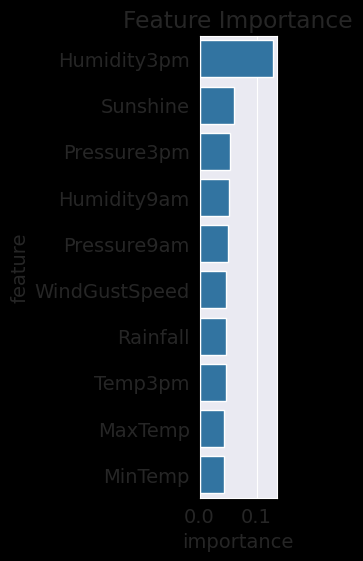

In [67]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' :model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(importance_df.head(10), x='importance', y='feature')

In [68]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [69]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [70]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)


In [71]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999693840062048, 0.8567499561121189)

In [72]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9869882026370576, 0.8447539352800046)

In [73]:
base_accs

(0.9999693840062048, 0.8567499561121189)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8557272319059477, 0.8468605535724735)

In [83]:
def test_params (**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [157]:
test_params()

(0.9999693840062048, 0.8567499561121189)

In [85]:
test_params(max_depth = 25)

(0.978385108380618, 0.8566914389373281)

In [ ]:
test_params(n_estimators=200, max_depth=25, max_leaf_nodes=2**13)

(0.9663224068253256, 0.8580373339575166)

In [ ]:
test_params(n_estimators=300, max_depth=25, max_features=12, max_leaf_nodes=2**13)

(0.9722517042903213, 0.8575106793843993)

In [131]:
test_params(min_samples_split = 20, min_samples_leaf=10)

(0.8798832510103278, 0.8537070630229973)

In [147]:
test_params(min_impurity_decrease = 1e-6)

(0.9887435196146467, 0.8569255076364913)

In [198]:
test_params( n_estimators=323, max_depth=25, max_features=12, max_leaf_nodes=2**13, min_impurity_decrease = 1e-8)

(0.9715985630893579, 0.8595002633272866)

In [174]:
test_params(max_samples = 0.9)

(0.9998469200310242, 0.8571595763356545)

In [ ]:
train_targets.value_counts()

RainTomorrow
No     76190
Yes    21798
Name: count, dtype: int64

In [183]:
test_params(class_weight={'No':1, 'Yes':3})

(0.9999693840062048, 0.8546433378196501)

In [182]:
base_accs

(0.9999693840062048, 0.8567499561121189)

In [200]:
aussie_rain = {
    'model' : model,
    'imputer' : imputer,
    'scaler' : scaler,
    'encoder' : encoder,
    'input_cols' : inputs_cols,
    'target_col' : target_col,
    'numeric_cols' : numeric_cols,
    'categorical_cols' : categorical_cols,
    'encoded_cols' : encoded_cols
}

joblib.dump(aussie_rain, 'aussie_rain.joblib')
aussie_rain2 = joblib.load('aussie_rain.joblib')